In [1]:
import uxarray as ux
import hvplot.pandas


hvplot.extension('matplotlib')


In [2]:
# # Dataset Path
# mpas_root_filepath = "../../test/meshfiles/mpas/"
# mpas_dataset_filepath = mpas_root_filepath + "QU/mesh.QU.1920km.151026.nc"
#
# uxgrid = ux.open_grid(mpas_dataset_filepath, use_dual=True)
# uxds = ux.UxDataset(uxgrid=uxgrid)

### Primal Mesh works fine, dual mesh fails because of `nNodes_per_face` and edges/nodes exisiting as faces

In [2]:
# Dataset Path
mpas_root_filepath = "../../test/meshfiles/mpas/"
mpas_dataset_filepath = mpas_root_filepath + "other/oQU480.230422.nc"

uxgrid = ux.open_grid(mpas_dataset_filepath, use_dual=False)
uxds = ux.UxDataset(uxgrid=uxgrid)

In [36]:
uxds.uxgrid.Mesh2_face_nodes.values

array([[                   0,                  444,                  448],
       [                   0,                  444,                  445],
       [                   0,                  445,                  446],
       ...,
       [-9223372036854775808,                 1783,                 1784],
       [                1785,                 1786,                 1787],
       [                1788,                 1789,                 1790]])

In [25]:
# Base data path
base_path = "../../test/meshfiles/ugrid/outCSne30/"

# Path to Grid file
grid_path = base_path + "outCSne30.ug"


data_path = base_path + "outCSne30_var2.nc"


uxds = ux.open_dataset(grid_path, data_path)
uxds


<xarray.UxDataset>
Dimensions:  (ncol: 5400)
Dimensions without coordinates: ncol
Data variables:
    var2     (ncol) float64 1.351 1.331 1.31 1.289 ... 0.7121 0.6909 0.67 0.6495

In [22]:
# Base data path
base_path = "../../test/meshfiles/ugrid/ov_RLL10deg_CSne4/"

# Path to Grid file
grid_path = base_path + "ov_RLL10deg_CSne4.ug"


data_path = base_path + "ov_RLL10deg_CSne4_vortex.nc"


uxds = ux.open_dataset(grid_path, data_path)
uxds


/Users/philipc/anaconda3/envs/uxarray-geometry/lib/python3.10/site-packages/uxarray/utils/helpers.py:598: RuntimeWarning: invalid value encountered in cast
  grid_var = grid_var.astype(new_dtype)


<xarray.UxDataset>
Dimensions:  (ncol: 856)
Dimensions without coordinates: ncol
Data variables:
    psi      (ncol) float64 1.054 0.9134 1.051 0.991 ... 0.7169 1.005 0.6899

In [8]:
base_path = "../../test/meshfiles/ugrid/geoflow-small/"
grid_path = base_path + "grid.nc"

data_path = base_path + "v1.nc"

uxds = ux.open_dataset(grid_path, data_path)
uxds


<xarray.UxDataset>
Dimensions:  (time: 1, meshLayers: 20, nMeshNodes: 6000)
Coordinates:
  * time     (time) float64 13.0
Dimensions without coordinates: meshLayers, nMeshNodes
Data variables:
    v1       (time, meshLayers, nMeshNodes) float64 -0.009766 ... 0.03283

In [2]:
# Base data path
base_path = "../../test/meshfiles/exodus/mixed/"

# Path to Grid file
grid_path = base_path + "mixed.exo"


# data_path = base_path + "outCSne30_var2.nc"


uxgrid = ux.open_grid(grid_path)

uxds = ux.UxDataset(uxgrid=uxgrid)
uxds


Finished reading exodus file.


<xarray.UxDataset>
Dimensions:  ()
Data variables:
    *empty*

In [45]:
uxgrid.Mesh2_node_x.values.min(), uxgrid.Mesh2_node_x.values.max()

(-1.0, 1.0)

In [49]:
# Base data path
base_path = "../../test/meshfiles/exodus/outCSne8/"

# Path to Grid file
grid_path = base_path + "outCSne8.g"

uxgrid = ux.open_grid(grid_path)

Finished reading exodus file.


In [47]:
uxgrid.Mesh2_node_x.unitsÍ

'degrees_east'

In [48]:
uxgrid.Mesh2_node_x.values.min(), uxgrid.Mesh2_node_x.values.max()

(-1.0, 1.0)

In [24]:
uxds.uxgrid.nNodes_per_face

<xarray.DataArray 'nNodes_per_face' (nMesh2_face: 3947)>
array([4, 4, 4, ..., 1, 4, 4])
Dimensions without coordinates: nMesh2_face
Attributes:
    long_name:  number of non-fill value nodes for each face

In [26]:
uxds.uxgrid.Mesh2_face_nodes.values

array([[                   0,                  444,                  448],
       [                   0,                  444,                  445],
       [                   0,                  445,                  446],
       ...,
       [-9223372036854775808,                 1783,                 1784],
       [                1785,                 1786,                 1787],
       [                1788,                 1789,                 1790]])

# Visualuzation

In [26]:
gdf = uxds.to_gdf()
gdf

,geometry
0,"MultiPolygon([[[135.0, -35.26438968275467, 138..."
1,"MultiPolygon([[[138.0, -36.617694956996594, 14..."
2,"MultiPolygon([[[141.0, -37.85242110467453, 144..."
3,"MultiPolygon([[[144.0, -38.97344733686565, 147..."
4,"MultiPolygon([[[147.0, -39.98557075458056, 150..."
...,...
5395,"MultiPolygon([[[-32.6684975672469, 43.07367919..."
5396,"MultiPolygon([[[-35.800657841659444, 42.011582..."
5397,"MultiPolygon([[[-38.900310392110214, 40.837603..."
5398,"MultiPolygon([[[-41.966828983940474, 39.549078..."


In [14]:
indices = uxds.uxgrid.antimeridian_faces

In [12]:
polygon_shells = uxds.uxgrid.polygon_shells

In [17]:
for i in indices:
    print(polygon_shells[i][:, 0])

[ 180.         -173.13852213 -173.29692196  180.          180.        ]
[ 180.         -173.29692196 -173.66205039  180.          180.        ]
[ 180.         -173.66205039 -174.14740636  180.          180.        ]
[ 180.         -174.14740636 -174.47392668  180.          180.        ]
[ 174.47392668  180.         -174.47392668  180.          174.47392668]
[ 167.37801996  180.         -167.37801996  180.          167.37801996]
[ 180.         -174.47392668 -162.87932728 -167.37801996  180.        ]
[ 158.93065256  180.         -158.93065256  180.          158.93065256]
[ 180.         -167.37801996 -152.36305775 -158.93065256  180.        ]
[ 144.  180. -144.    0.  144.]
[ 180.         -158.93065256 -144.         -144.          180.        ]
[ 178.03969954  180.         -178.03969954  180.          178.03969954]
[ 175.88807442  180.         -175.88807442  180.          175.88807442]
[ 180.         -178.03969954 -173.90515745 -175.88807442  180.        ]
[ 175.3933241  180.        -175.

In [21]:

for P in gdf.geometry:
    print(" ")
    print(P)

 
MultiPolygon([[[0.0, 58.28252558853901, 5.213775544464037, 59.79991207908455, 5.342911774263255, 62.30166354592391, 0.0, 61.00191463565871, 0.0, 58.28252558853901]]])
 
MultiPolygon([[[5.213775544464037, 59.79991207908455, 16.497973615369702, 62.057135014237154, 16.75879352974864, 64.14507696004404, 5.342911774263255, 62.30166354592391, 5.213775544464037, 59.79991207908455]]])
 
MultiPolygon([[[16.497973615369702, 62.057135014237154, 29.138522134067443, 63.26985990157663, 29.296921961921065, 64.99089822515047, 16.75879352974864, 64.14507696004404, 16.497973615369702, 62.057135014237154]]])
 
MultiPolygon([[[29.138522134067443, 63.26985990157663, 35.99999999999999, 63.43494882292202, 36.0, 65.00022825178827, 29.296921961921065, 64.99089822515047, 29.138522134067443, 63.26985990157663]]])
 
MultiPolygon([[[0.0, 61.00191463565871, 5.342911774263255, 62.30166354592391, 5.660830731449789, 67.07466916069762, 0.0, 66.21189419140426, 0.0, 61.00191463565871]]])
 
MultiPolygon([[[5.34291177426

:Polygons   [x,y]
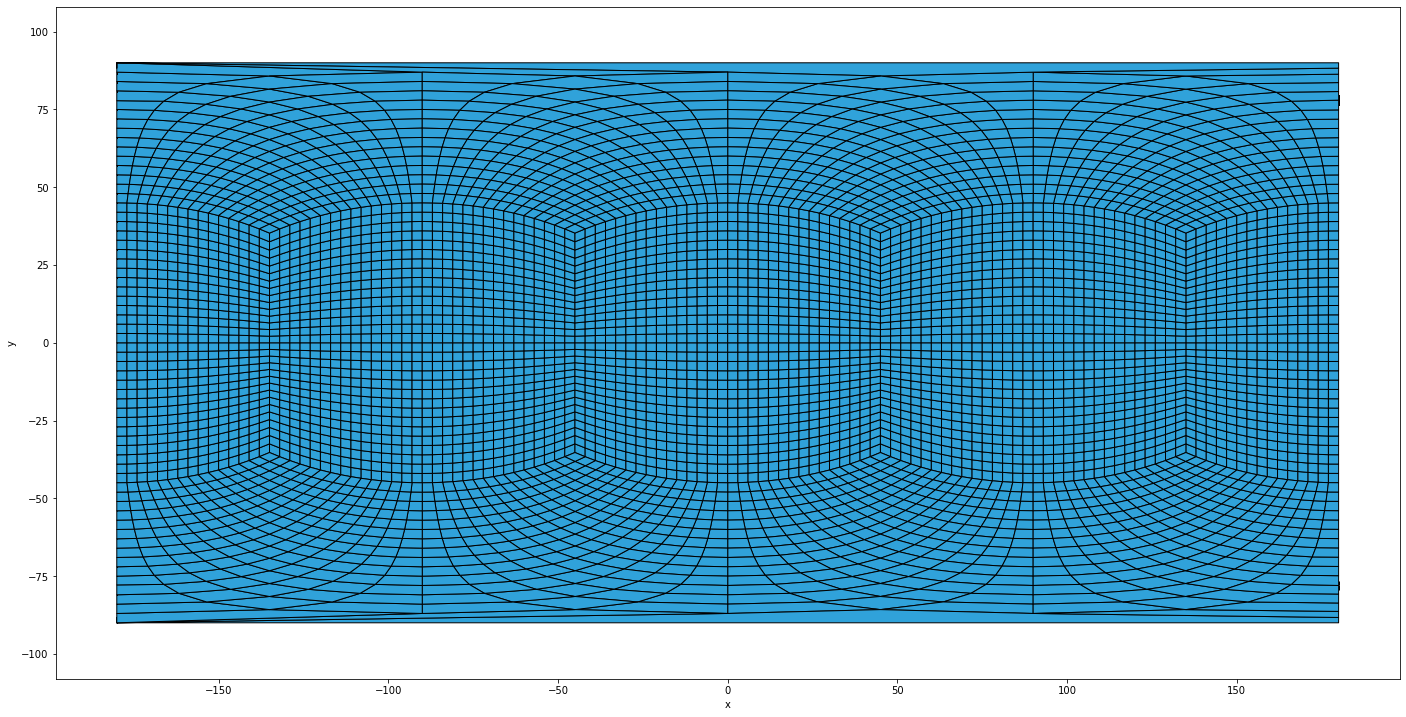

In [27]:
gdf.hvplot(height=1000, width=2000)